# Assignment 1 - Flower Drawing Optimization

Who doesn't love flowers? In this assignment we will plot many beautiful flowers using my very special custom algorithm. It is blazingly fast, and chock-a-block full of state of the art optimizations!

In [ ]:
# Ignore me
%load_ext autoreload

In [60]:
# Ignore me - im just an import block
%autoreload 2

from BadFlowers import BadFlowerDrawer
import matplotlib.pyplot as plt
import random as rnd
import time
import cProfile
import subprocess
from IPython.display import Image

## Lets use my super special algorithm to plot a flower
As you can see, we can specify the number of petals, the center of the flower, and the size you would like it to be.

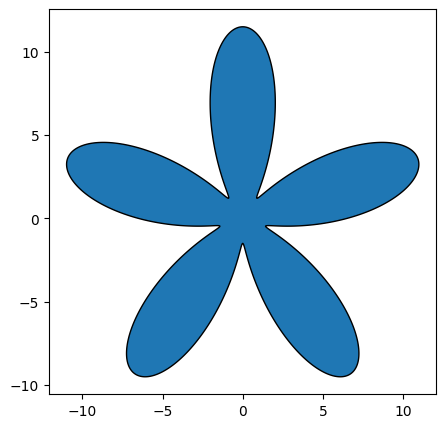

In [71]:
#TODO: Make multiple graphs where the flower is in different petal numbers, and centers
bad_flower_instance = BadFlowerDrawer()
x, y = bad_flower_instance.draw_one_flower(petal_len=5)

plt.figure(figsize=(5,5))
plt.fill(x,y, edgecolor='black')
plt.show()


## Lets plot even more fun flowers
I have also added a feature to plot as many flowers as you wish! All you have to do is supply a list of tuples containing the center point and size of the flower you would like to draw, and my algorithm will take care of the rest.

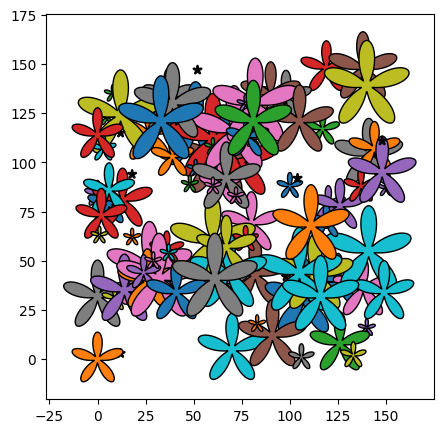

Total Time to compute 100 flowers: 1.0112891089993354


In [68]:
num_flowers = 100 
inputs = [(rnd.randint(0,150), rnd.randint(0,150), rnd.randint(1,10)) for _ in range(num_flowers)]

start = time.perf_counter()
flowers = bad_flower_instance.draw_many_flower(inputs)
stop = time.perf_counter()

plt.figure(figsize=(5,5))
for t in flowers:
    plt.fill(t[0], t[1], edgecolor='black')

plt.show()

print(f"Total Time to compute {num_flowers} flowers: {stop-start}")

## And it only took XXX seconds to draw all of those flowers...
Huh, thats not as fast as I had hoped... Maybe we can do some profiling to figure out where I am losing all of this time...

In [64]:
cProfile.run('bad_flower_instance.draw_many_flower(inputs)')

         3501105 function calls in 2.202 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.021    0.021    2.202    2.202 <string>:1(<module>)
      100    0.001    0.000    0.064    0.001 BadFlowers.py:12(calc_thetas)
      100    0.063    0.001    0.063    0.001 BadFlowers.py:15(<listcomp>)
      100    0.983    0.010    2.118    0.021 BadFlowers.py:17(draw_one_flower)
   500100    0.252    0.000    0.339    0.000 BadFlowers.py:28(compute_r_polar)
   500100    0.404    0.000    0.562    0.000 BadFlowers.py:32(polar_to_cartesian)
        1    0.063    0.063    2.181    2.181 BadFlowers.py:38(draw_many_flower)
        1    0.000    0.000    0.000    0.000 cycler.py:239(__iter__)
        1    0.000    0.000    2.202    2.202 {built-in method builtins.exec}
   500100    0.104    0.000    0.104    0.000 {built-in method builtins.len}
  1000200    0.160    0.000    0.160    0.000 {built-in method math.cos}
   50010

## While this is useful info, Its quite dense to read - lets make it a graphical view

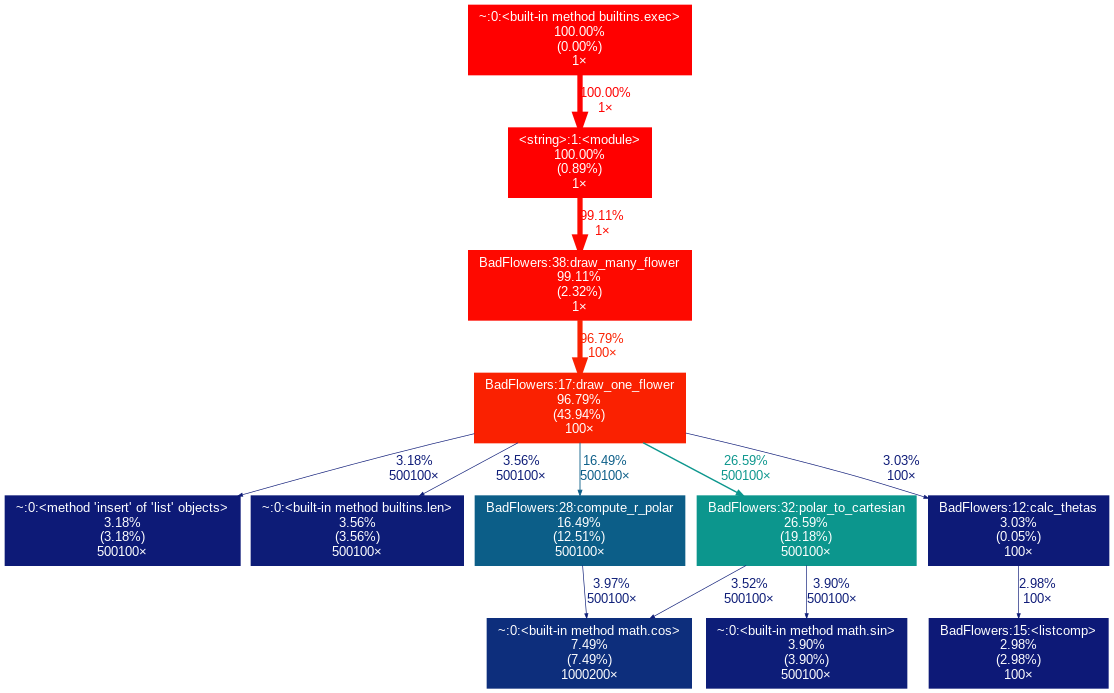

In [70]:
cProfile.run('bad_flower_instance.draw_many_flower(inputs)', 'flowers.pstats')
subprocess.call(['python3', 'gprof2dot.py', '-f', 'pstats', './flowers.pstats', '-o', 'flowers.dot' ])
subprocess.call(['dot', '-Tpng', '-o', 'flowers.png', 'flowers.dot' ])
Image('flowers.png')

# Lets isolate the problem and Fix it!

- import my_flower_drawer
- setup testing structure
- setup a performace counter and 
- demonstrate wrong circles
- describe task
- make autograder